# 6. 分析結果（中区分全体）

In [1]:
# coding: shift-jis
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_amazon = pd.read_csv('api_data_smart_watches.csv')

/home/kyohei/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
data_amazon.columns

Index([u'asin', u'date', u'manufacturer', u'price', u'rank', u'average_rate',
       u'num_of_rate', u'review_url'],
      dtype='object')

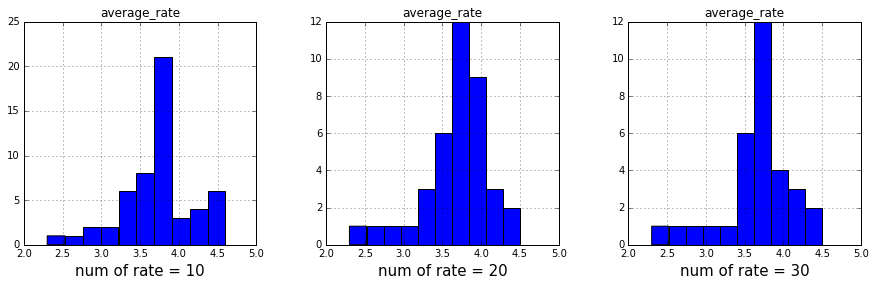

In [3]:
fig = plt.figure(figsize=(15,4))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
data_amazon[data_amazon['num_of_rate'] >= 10].hist('average_rate',ax=ax1,bins=10)
data_amazon[data_amazon['num_of_rate'] >= 20].hist('average_rate',ax=ax2,bins=10)
data_amazon[data_amazon['num_of_rate'] >= 30].hist('average_rate',ax=ax3,bins=10)
ax1.set_xlabel("num of rate = 10",fontsize=15)
ax2.set_xlabel("num of rate = 20",fontsize=15)
ax3.set_xlabel("num of rate = 30",fontsize=15)
plt.show()

In [4]:
data_10 = data_amazon[data_amazon[u'num_of_rate'] >= 10]
#succeed
suc = data_10[data_10['average_rate']>=4.0]
print('succeeded companies are \n%s') %suc[u'manufacturer'].unique()
#normal
normal = data_10[(data_10['average_rate'] >= 3.5) & (data_10['average_rate'] <= 3.8)]
print('\nnormal companies are \n%s') %str(normal[u'manufacturer'].unique()).decode('string-escape')
#fale
fale = data_10[data_10['average_rate'] < 3.5]
print('\nfalse companies are \n%s') %str(fale[u'manufacturer'].unique()).decode('string-escape')

succeeded companies are 
['EloBeth' 'OEM' 'Pebble' 'ASUSTek' 'Samsung' 'by Galaxy']

normal companies are 
['null' 'OZONE' 'Sony' 'Pebble' 'Withings'
 'ソニー' 'Motorola' 'Shenzhen Wave' 'HUAWEI'
 'Leesentec(リーセンテック)']

false companies are 
['Shenzhen Wave' 'STK'
 'ネット販売専門'
 'Eagle　Eye' 'MisSmart'
 'Sleep tracker(スリープトラッカー)'
 nan 'Sony' 'Sincere　Inc.' 'Withings' 'Samsung']


In [5]:
company_suc = [u'サムスン',u'ASUSTEK COMPUTER INC.'] #[u'サムスン',u'ASUSTEK COMPUTER INC.',u'ペブルテクノロジー']
company_nor = [u'モトローラ',u'ソニー'] #[u'モトローラ',u'ソニー',u'ファーウェイ']

data_pat = pd.read_csv('/home/kyohei/wearable/data/01.文献リスト_特許.csv',encoding='SHIFT-JIS')
categories_small = pd.read_csv('/home/kyohei/wearable/data/T_小区分.csv',encoding='SHIFT-JIS')
categories_midlle = pd.read_csv('/home/kyohei/wearable/data/T_中区分.txt',encoding='SHIFT-JIS')

data_suc_pat = data_pat[data_pat[u"筆頭出願人名"].isin(company_suc)]
data_fal_pat = data_pat[data_pat[u"筆頭出願人名"].isin(company_nor)]

data_suc_pat['succeed'] = 1
data_fal_pat['succeed'] = 0

data_all = pd.concat([data_suc_pat,data_fal_pat],axis=0)
data_all_watch = data_all[data_all[u'B0302']==1]

/home/kyohei/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/kyohei/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/kyohei/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [6]:
print("成功企業の内訳\n%s"%data_all_watch[data_all_watch['succeed']==1][u'筆頭出願人名'].value_counts())
print("\n非成功企業の内訳\n%s"%data_all_watch[data_all_watch['succeed']==0][u'筆頭出願人名'].value_counts())

成功企業の内訳
サムスン                     134
ASUSTEK COMPUTER INC.      5
Name: 筆頭出願人名, dtype: int64

非成功企業の内訳
ソニー      36
モトローラ     9
Name: 筆頭出願人名, dtype: int64


In [7]:
midlle_class = categories_midlle[u'記号'].values
df = []
keys = []
data_all_cal = data_all.iloc[:,19:]
for value in midlle_class:
    category = categories_small[categories_small[u'記号'].str.startswith(value)]
    data_middle = data_all_watch[category[u'記号']].apply(lambda x: (np.sum(x)) / (np.sum(x)) if np.sum(x) > 0 else np.sum(x),axis=1)
    df.append(data_middle)
    keys.append(value)
df_middle = pd.concat(df,keys=keys,axis=1)

In [8]:
data_all_cal = pd.concat([data_all_watch.iloc[:,:19],df_middle,data_all_watch.iloc[:,-1:]],axis=1)

In [9]:
data_suc_cal = data_all_cal[data_all_cal['succeed']==1].iloc[:,19:-1].sum() / float(data_all_cal[data_all_cal['succeed']==1].shape[0])
data_fal_cal = data_all_cal[data_all_cal['succeed']==0].iloc[:,19:-1].sum() / float(data_all_cal[data_all_cal['succeed']==0].shape[0])

compare_category = pd.concat([data_suc_cal,data_fal_cal],axis=1)
compare_category.rename(columns={0:"succeed",1:"normal"},inplace=True)
compare_category["diff"] = compare_category["succeed"] - compare_category["normal"]
compare_category["diff_abs"] = abs(compare_category["succeed"] - compare_category["normal"])

categories_midlle = categories_midlle.set_index(u"記号",drop=True)
compare_category = pd.concat([categories_midlle,compare_category],axis=1)

In [10]:
#data_all = data_all.fillna(0)

data_all_test = data_all_cal.iloc[:,19:]
data_all_test = data_all_test.loc[:,((data_all_cal.sum() > 0) & (data_all_cal.sum() < data_all_cal.shape[0]))]

from scipy.stats import chi2_contingency
data_all_test.columns[:-1]
pvalues = []
columns = data_all_test.columns[:-1]
for row in columns:
    table = pd.crosstab(data_all_test['succeed'],data_all_test[row])
    chisq_value,pvalue,df,expected = chi2_contingency(table,correction=False) #補正無し:correction=False
    pvalues.append([row,pvalue,chisq_value,df])

pvalues_df = pd.DataFrame(np.array(pvalues)[:,1],index=np.array(pvalues)[:,0],columns=['pvalue'])
compare_category = pd.concat([compare_category,pvalues_df],axis=1)
compare_category['pvalue'] = compare_category['pvalue'].astype(float)

### 6.1 プラス域（成功企業の方が比率が高い）の注目技術
- 電源装置
- 全体設計（デザイン）

### 6.2 マイナス域（非成功企業の方が比率が高い）の注目技術
- ヘルスケア用途
- 訪問地
- 通信方式
- センサ（気候、バイタル、ポジション）
- 情報（オケーショナル、気候、場所・周辺、バイタル）

### 6.3 考察
小区分毎で差のあった区分の所属する中区分で同様に差があるという結果になった。成功企業では、電源装置や全体設計（デザイン）で出願比率が高く、ウェアラブルのハード的側面に対して注力していると考えられる。他方、非成功企業ではヘルスケア用途、訪問地というように、利用場面を想定していることが伺える。

In [11]:
compare_category.sort_values('diff',ascending=False).head(20).style.bar(subset=['succeed','normal','diff_abs'],color='#d65f5f')

### マイナス域 

In [12]:
compare_category.sort_values('diff',ascending=True).head(20).style.bar(subset=['succeed','normal','diff_abs'],color='#d65f5f')

### 絶対値

In [13]:
compare_category[compare_category['diff_abs'] >= 0.2].sort_values('diff_abs',ascending=False).style.bar(subset=['succeed','normal','diff_abs'],color='#d65f5f')

# 7. 分析結果（大区分毎）

### 7.1 用途
- ヘルスケア用途で非成功企業の出願比率が高かった。スポーツ用途でも小さいながら差がでた。

In [14]:
compare_category[compare_category.index.str.startswith("H")].style.bar(subset=['succeed','normal','diff_abs'],color='#d65f5f')

### 7.2 情報
- 基本データで非成功企業の出願件数比率がたかった。特徴のある区分ではないので、ここでは注目しなかった。
- 気候データ、場所・周辺データ、オケージョナルデータ、バイタルデータで非成功企業の出願比率がたかった。

In [15]:
compare_category[compare_category.index.str.startswith("I")].style.bar(subset=['succeed','normal','diff_abs'],color='#d65f5f')

### 7.3 センサー
- バイタルセンサ、ポジションセンサ、気候センサで差が出た。

In [16]:
compare_category[compare_category.index.str.startswith("F")].style.bar(subset=['succeed','normal','diff_abs'],color='#d65f5f')